# Baseball Case Study

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features which are Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. With these inputs we have to predict the number of wins for a given team.

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from scipy.stats import zscore
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import OrdinalEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('baseball.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [3]:
#checking the data dimensions
df.shape

(30, 17)

In [4]:
#checking the columns in the dataset
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [5]:
#checking the datatypes of each column
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

>As we can see all the columns in the dataset have only numeric values

In [6]:
#checking the null values in each column of the dataset
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

<AxesSubplot:>

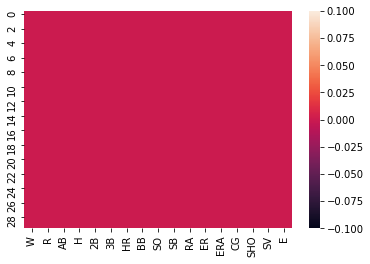

In [7]:
sns.heatmap(df.isnull())

>As we can see through the above 2 observations there are no null values present in the dataset

In [8]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [9]:
#checking the information regarding the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.0 KB


Visualization of the data

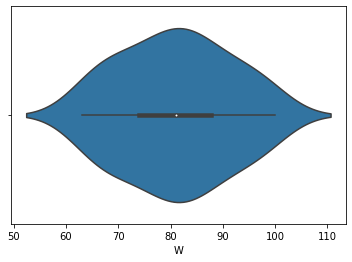

In [10]:
sns.violinplot(x= "W", data=df)
plt.show()

>Through the above graph we can observe that majority of the teams have no of wins in the range of 65 to 100.

<AxesSubplot:>

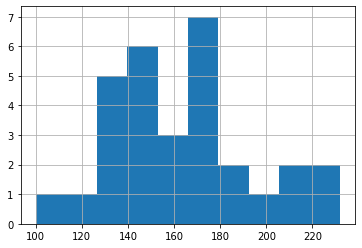

In [11]:
df.HR.hist()

>As we can see through the above graph the runs scored by home runs by the teams are majority lie in the range of 127 to 180.

<AxesSubplot:>

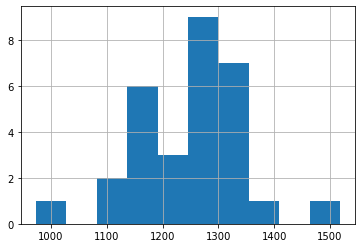

In [12]:
df.SO.hist()

>Through the above graph we can see the majority of players that strike out in a team in this season(2014) are lie in the range of 1100 to 1350.

<AxesSubplot:xlabel='HR'>

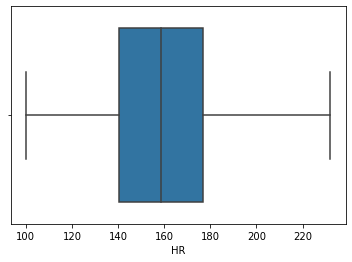

In [13]:
sns.boxplot(x=df.HR)

>We Can see from the above graph that the minimum 100 Home runs is scored by a team and maximum 230 Home Runs are scored by a team in this season(2014).

>the range in which most of the teams scored Home Runs is between 140 to 178.

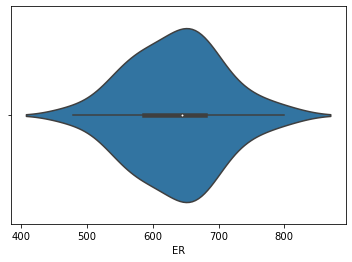

In [14]:
sns.violinplot(x= "ER", data=df)
plt.show()

>We can see through above graph that majority of the team scored 550 to 750 runs.

<AxesSubplot:xlabel='E', ylabel='W'>

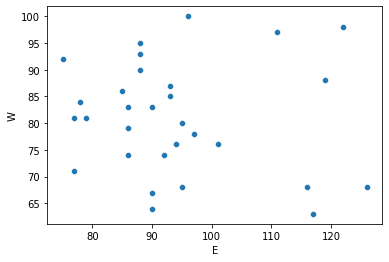

In [15]:
sns.scatterplot(data=df,x='E',y='W')

>As we can see through the above graph that as the errors are increasing, the number of wins are becoming less.

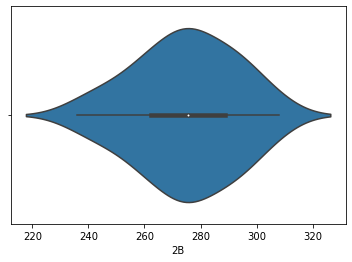

In [16]:
sns.violinplot(x= "2B", data=df)
plt.show()

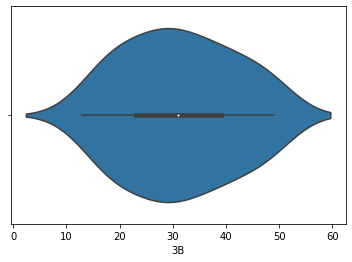

In [17]:
sns.violinplot(x= "3B", data=df)
plt.show()

>Through the above 2 graphs, we can observe that Majority of the times the  players reach the Second base as compare to the third base.

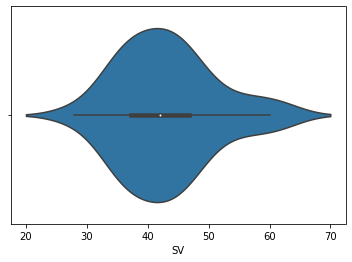

In [18]:
sns.violinplot(x= "SV", data=df)
plt.show()

>Through the above graph we can see that between 30 to 55 times the players are saved in the 2014 season.

<AxesSubplot:xlabel='SB'>

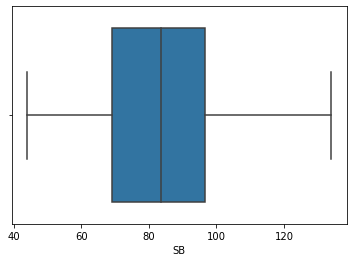

In [19]:
sns.boxplot(x=df.SB)

>Through the above graph , we can see that 70 to 95 times the bases were stolen by the batter and the pitcher was not able to out that batter.

<AxesSubplot:>

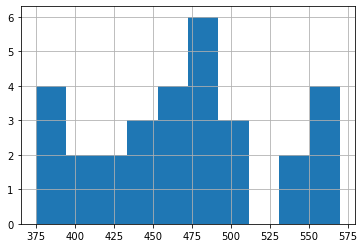

In [20]:
df.BB.hist()

>From the above graph we can see that the batter is getting the walks by the umpire in the range of 375 to 570.

array([[<AxesSubplot:title={'center':'W'}>,
        <AxesSubplot:title={'center':'R'}>,
        <AxesSubplot:title={'center':'AB'}>,
        <AxesSubplot:title={'center':'H'}>,
        <AxesSubplot:title={'center':'2B'}>,
        <AxesSubplot:title={'center':'3B'}>],
       [<AxesSubplot:title={'center':'HR'}>,
        <AxesSubplot:title={'center':'BB'}>,
        <AxesSubplot:title={'center':'SO'}>,
        <AxesSubplot:title={'center':'SB'}>,
        <AxesSubplot:title={'center':'RA'}>,
        <AxesSubplot:title={'center':'ER'}>],
       [<AxesSubplot:title={'center':'ERA'}>,
        <AxesSubplot:title={'center':'CG'}>,
        <AxesSubplot:title={'center':'SHO'}>,
        <AxesSubplot:title={'center':'SV'}>,
        <AxesSubplot:title={'center':'E'}>, <AxesSubplot:>]], dtype=object)

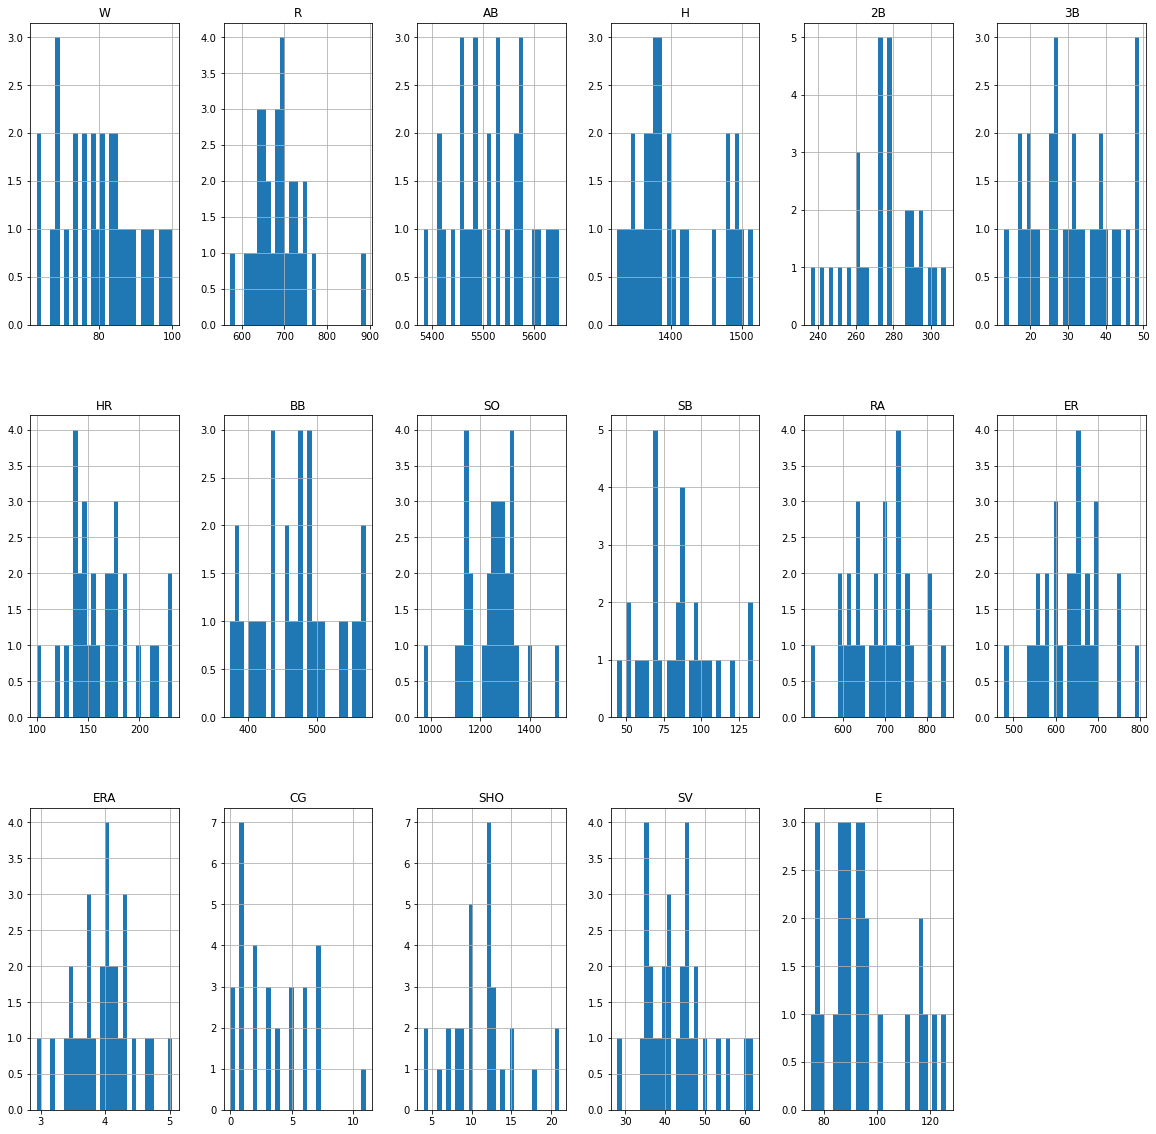

In [21]:
# Histogram to see the data distribution of all the columns'
df.hist(figsize=(20,20), grid = True, layout = (3,6), bins = 30)

> Through the above graphs we can see that data is highly distributed in almost all the columns.

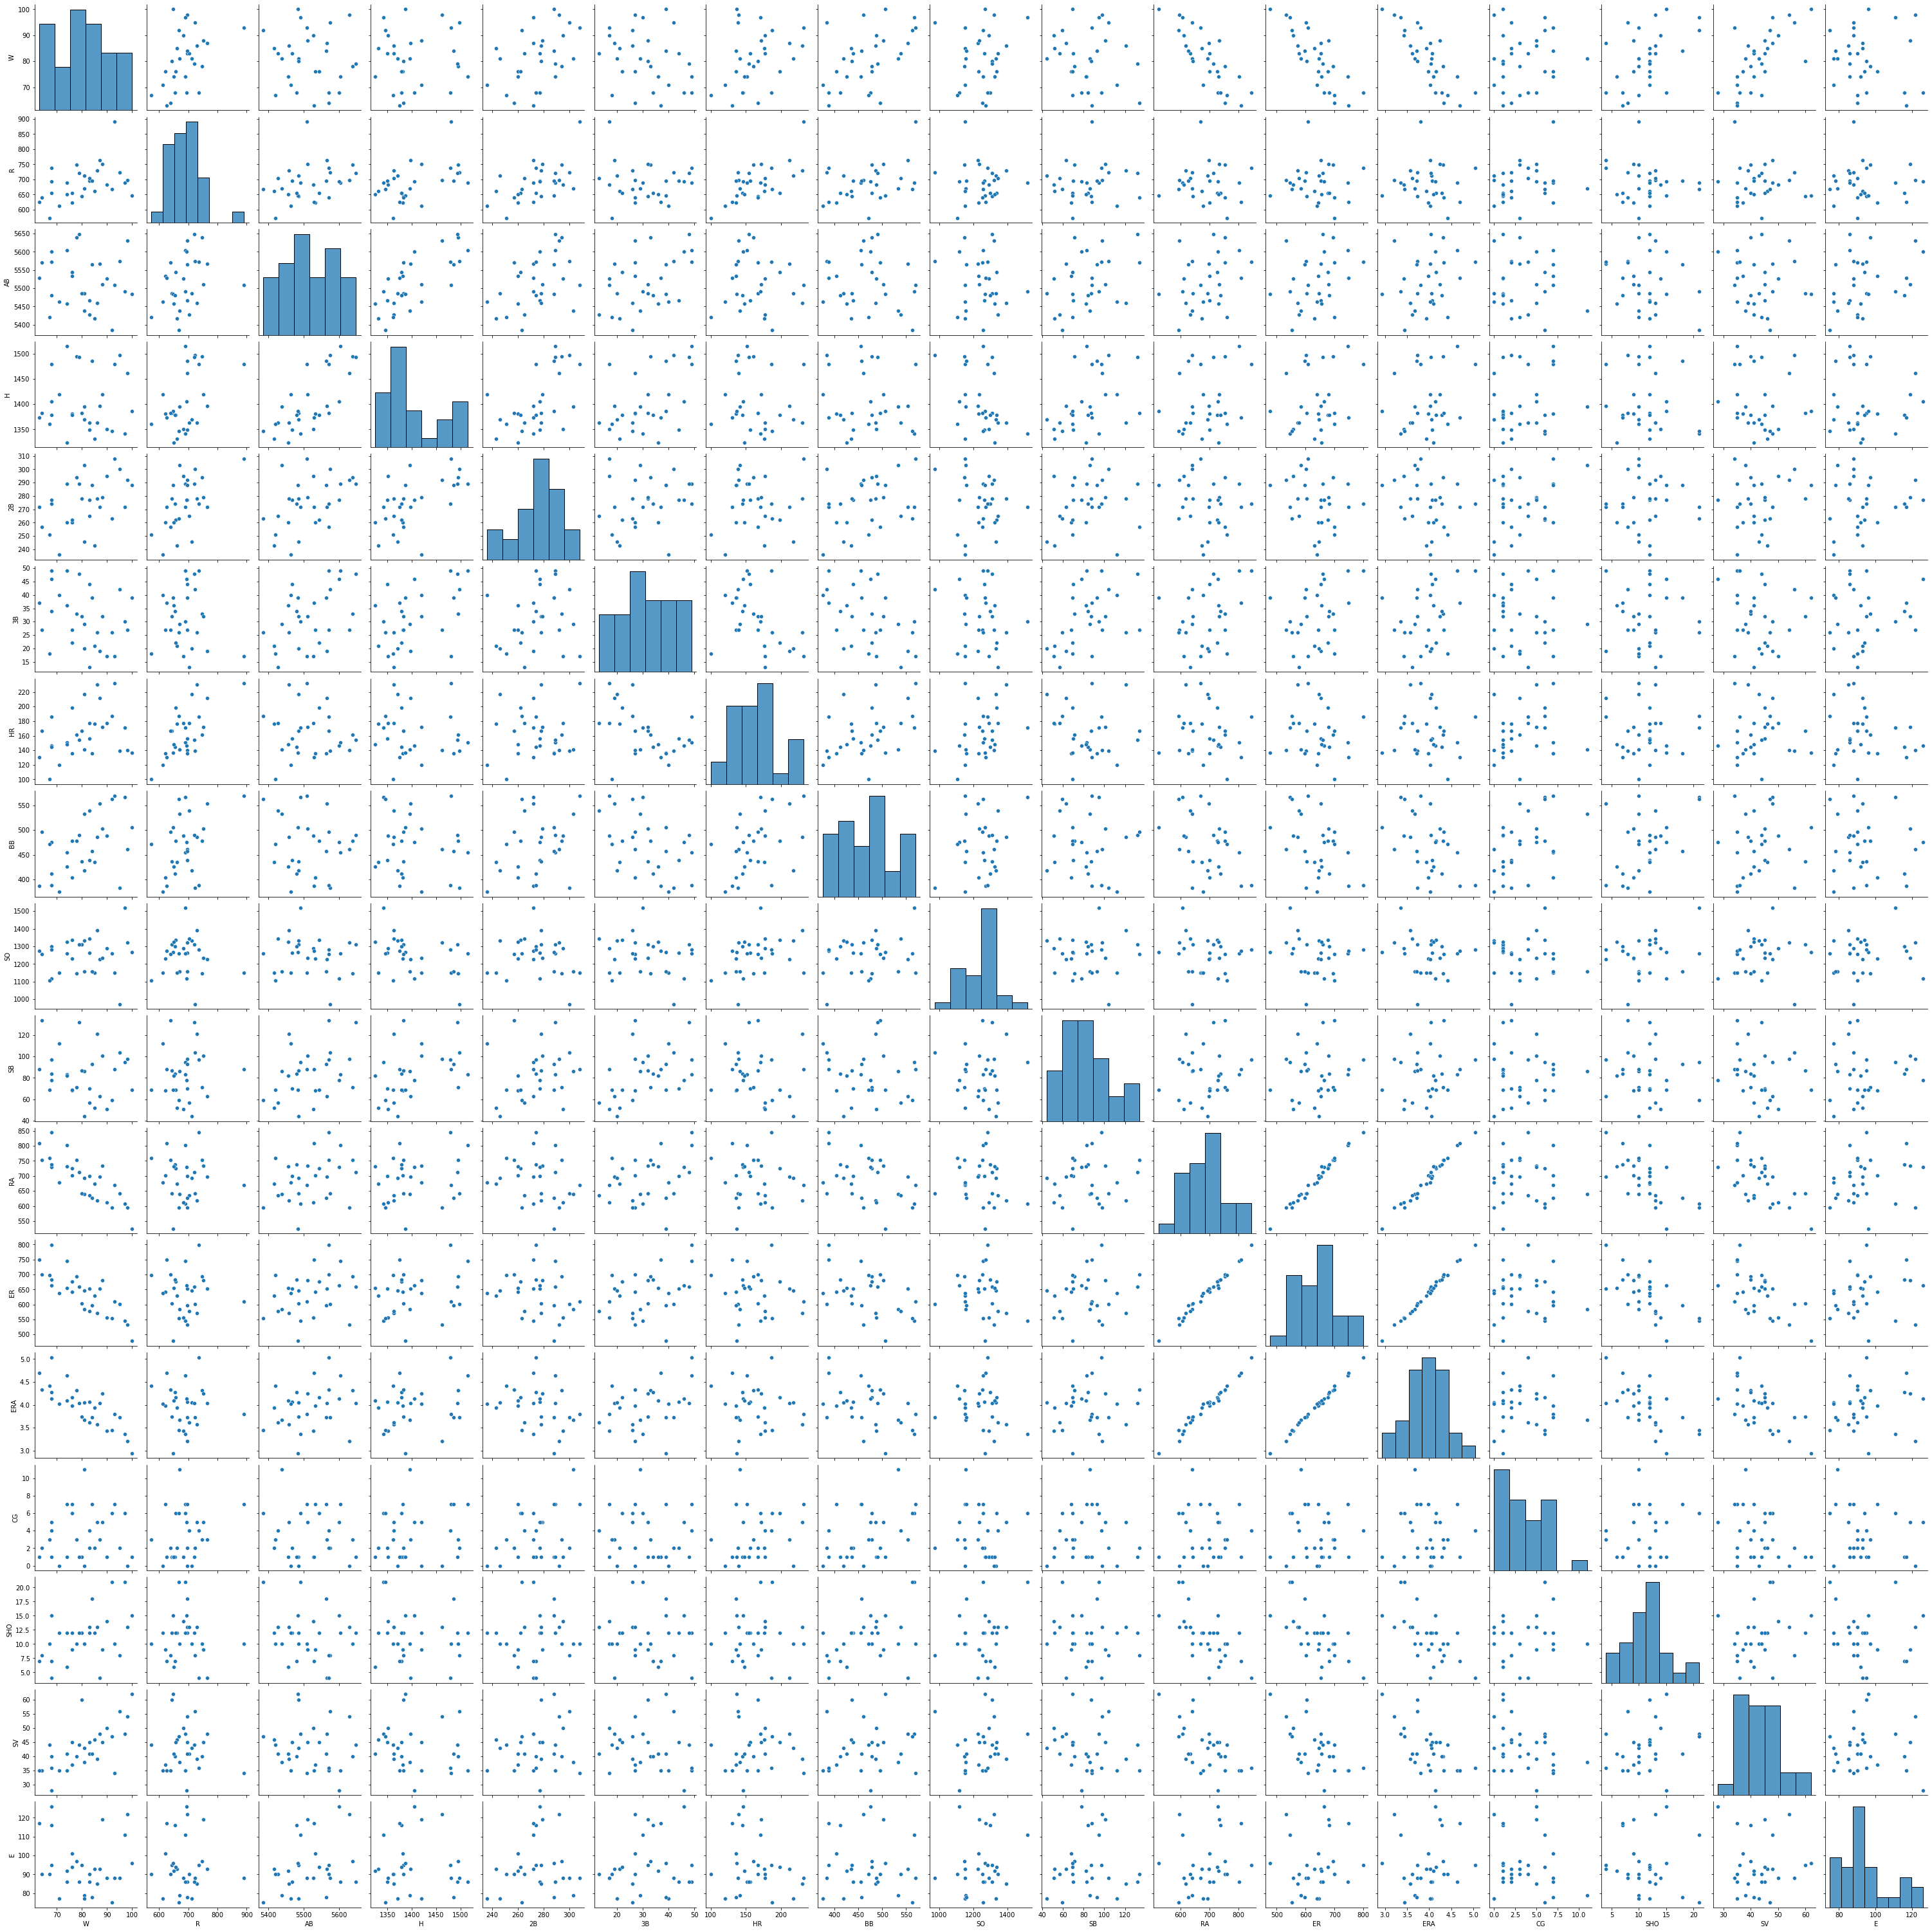

In [22]:
sns.pairplot(df)

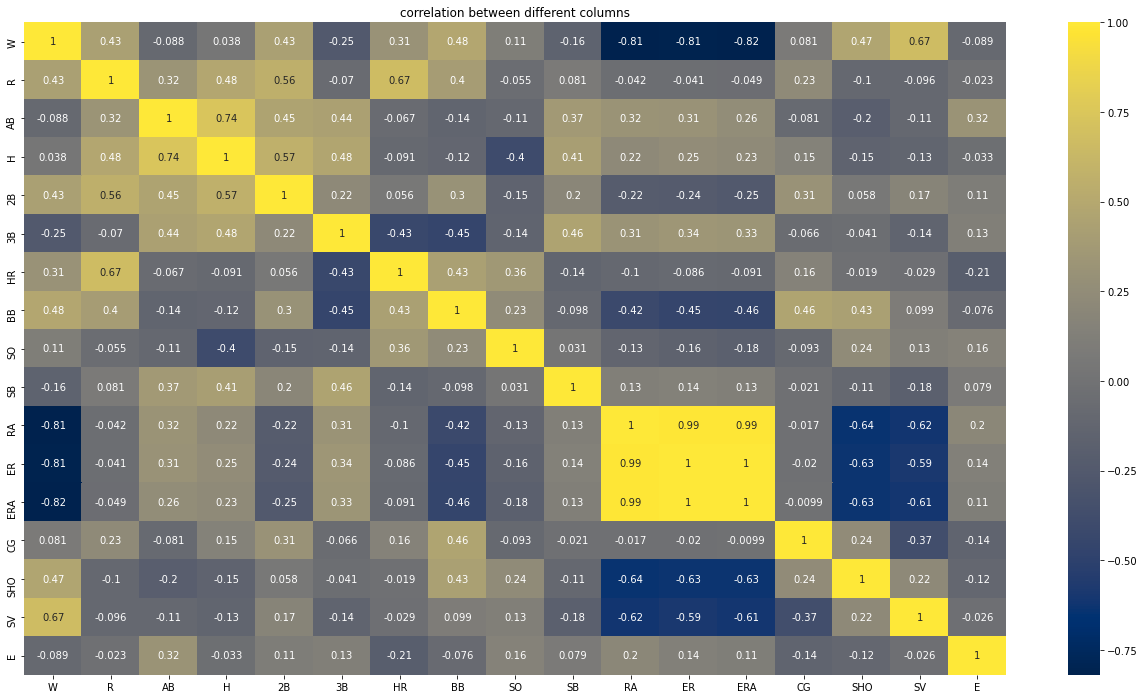

In [23]:
# Let's see the correlation between different columns.
corr_df= df.corr()

plt.figure(figsize=[22,12])
sns.heatmap(corr_df,cmap="cividis",annot=True)
plt.title('correlation between different columns')
plt.show()

> Through the above correlation heatmap following are the findings:-
    
   >Runs allowed, Earned runs, Earned runs average and saves are the most positive correlated columns with the wins columns.
    
   >Error are the least correlated column with the wins column, as if errors are increasing the no of wins will be decreased.
    
   >We can observe that all the columns which have runs in it are moderately positive correlated to the wins column as runs        help the team to win the match.

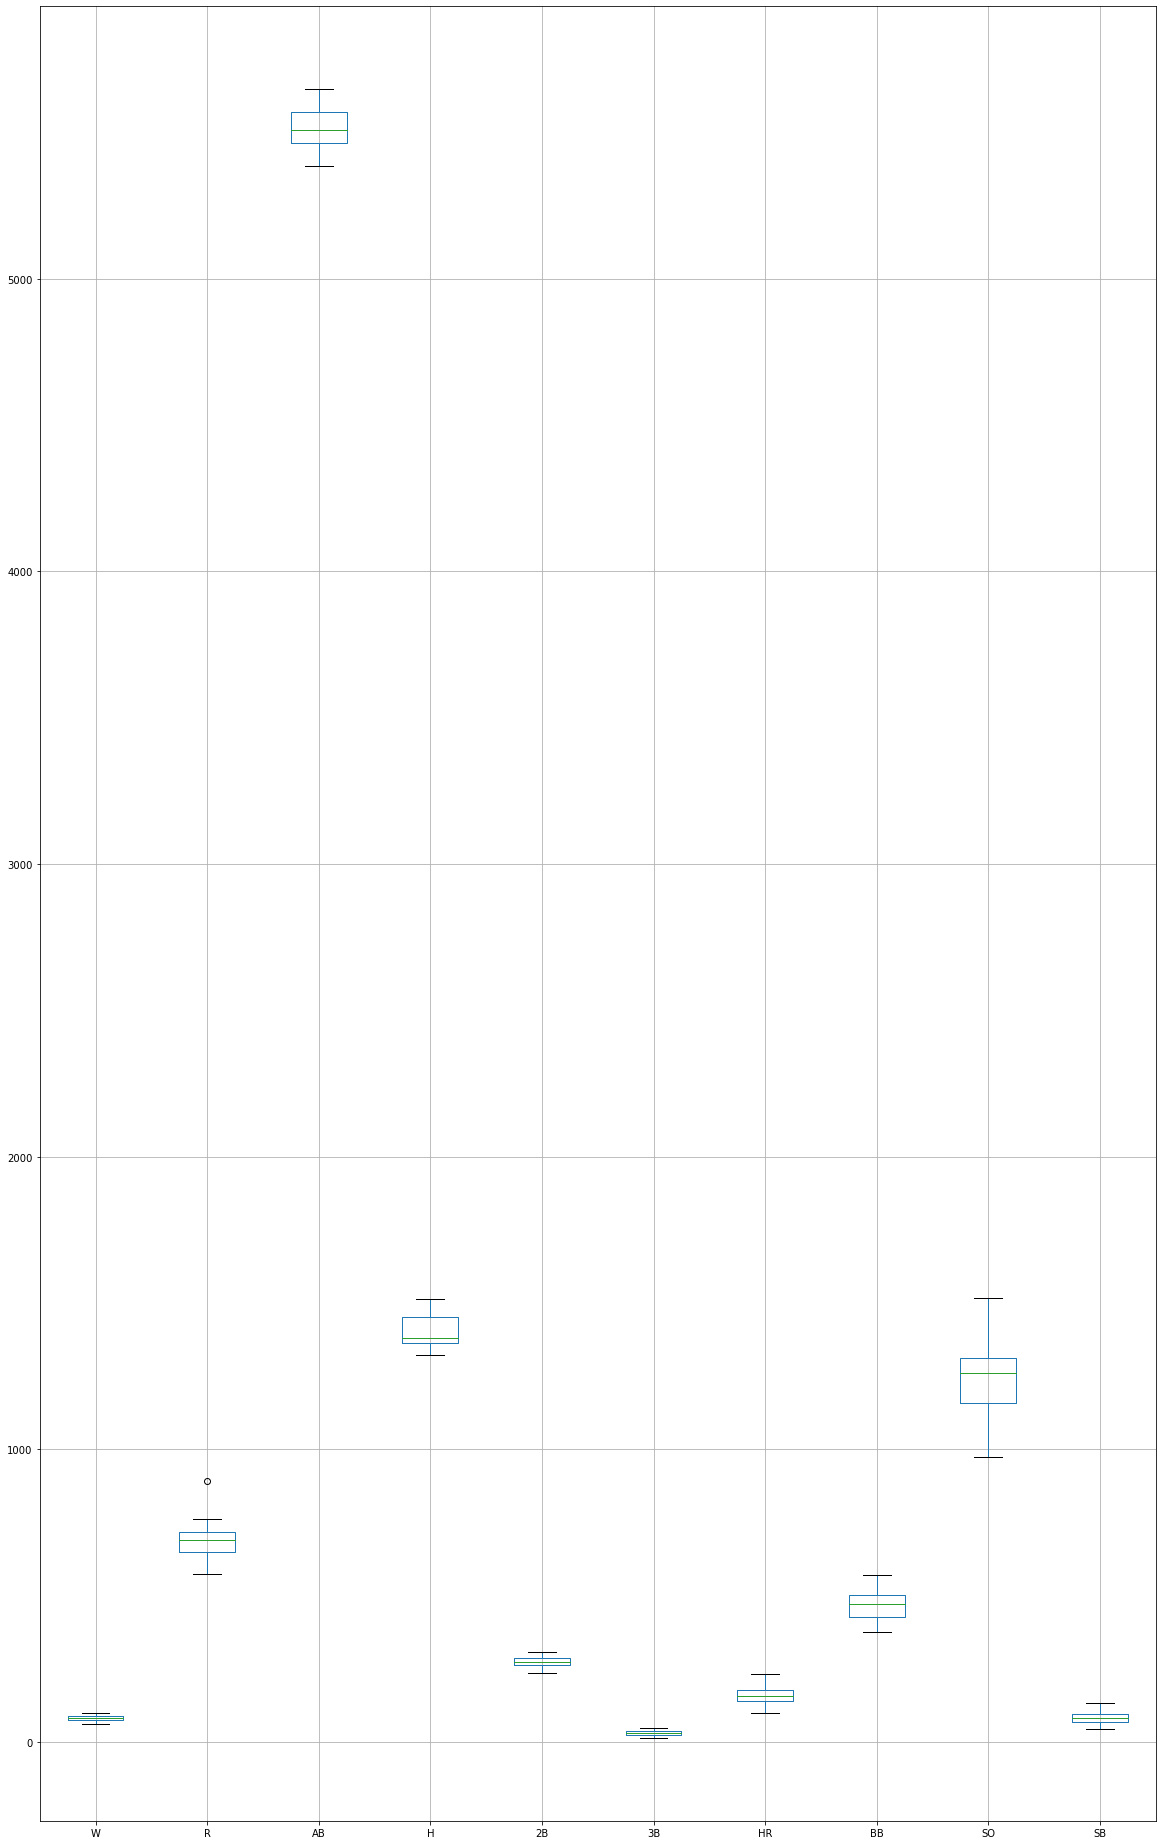

In [24]:
#checking the outliers
df.iloc[:,0:10].boxplot(figsize=[20,40])
plt.subplots_adjust(bottom=0.25)
plt.show()

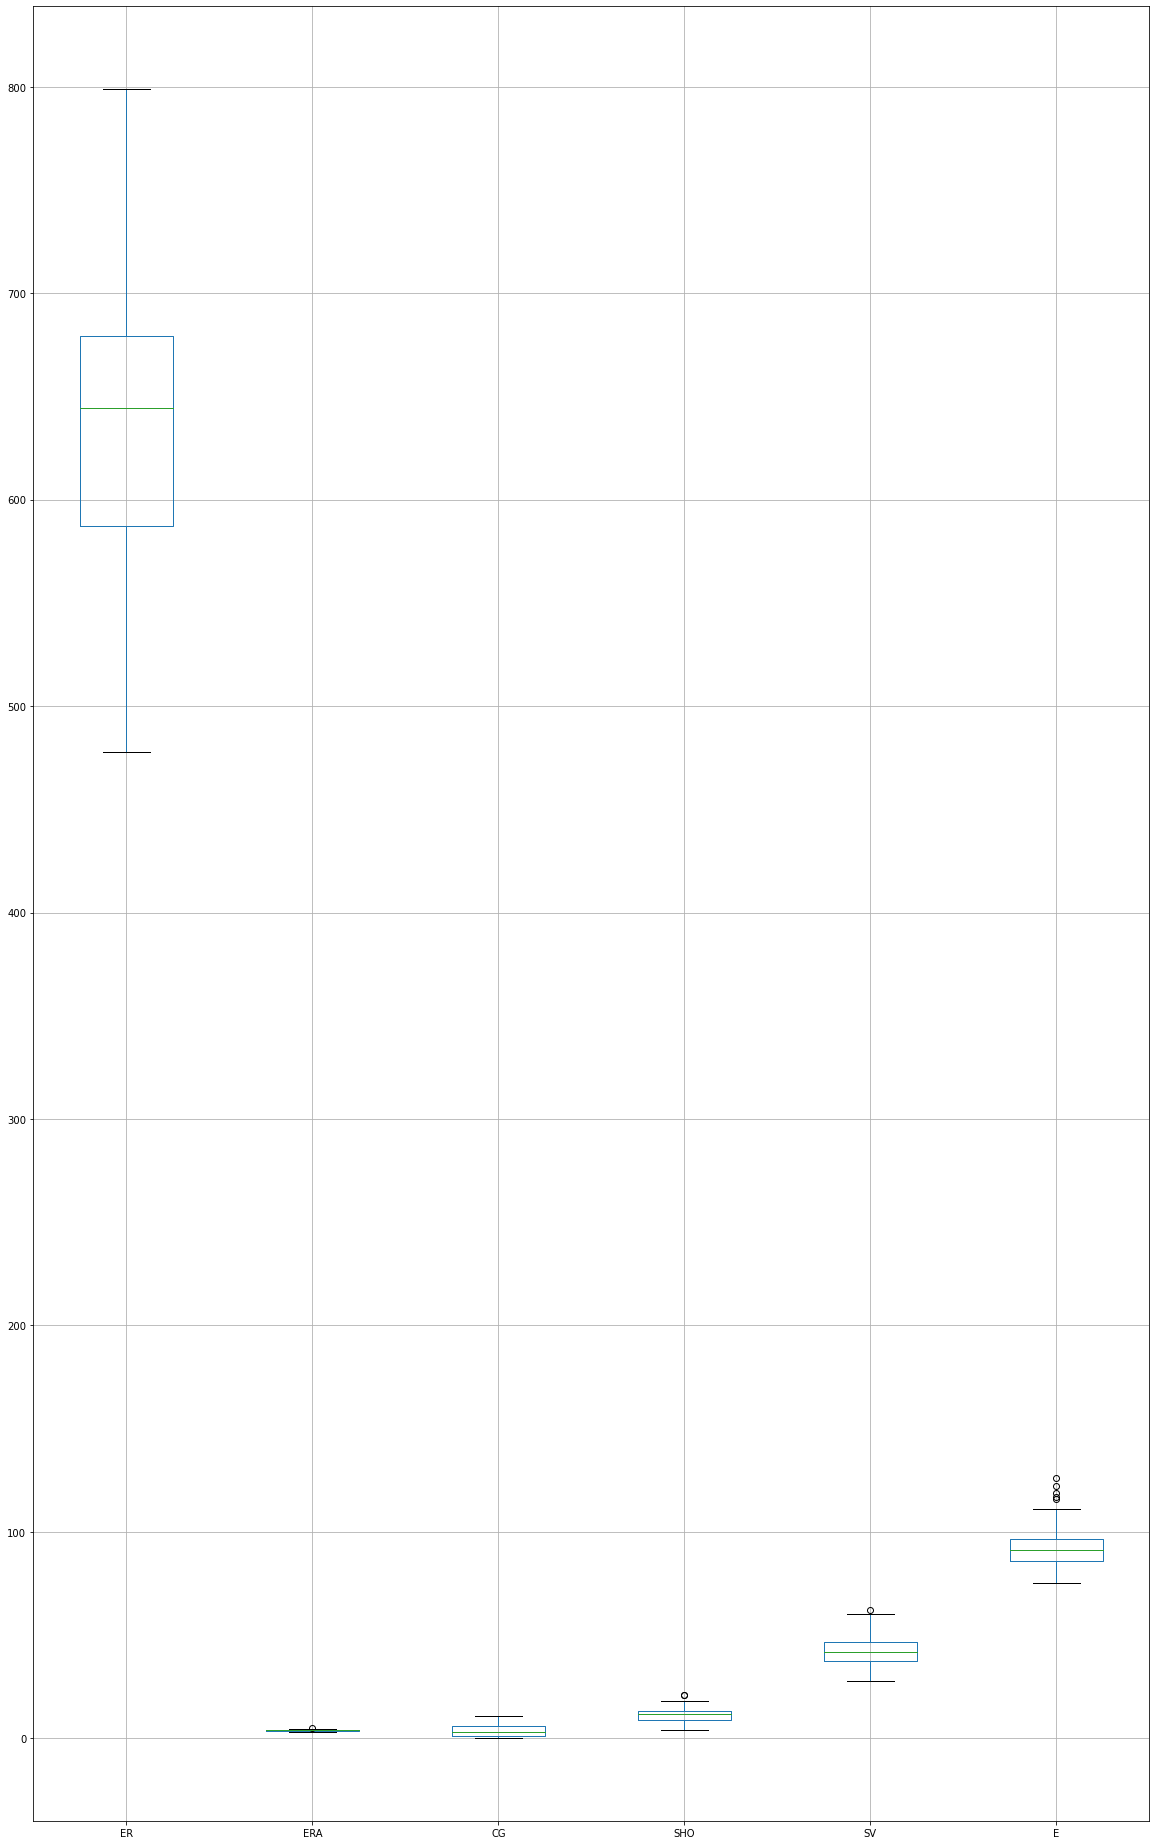

In [25]:
df.iloc[:,11:18].boxplot(figsize=[20,40])
plt.subplots_adjust(bottom=0.25)
plt.show()

>As we can see through the above 2 plots that their are no considerable outliers present in the dataset.

In [26]:
#splitting the dataset into independent and target variables in x and y respectively

x=df.drop('W', axis=1)
y=df['W']

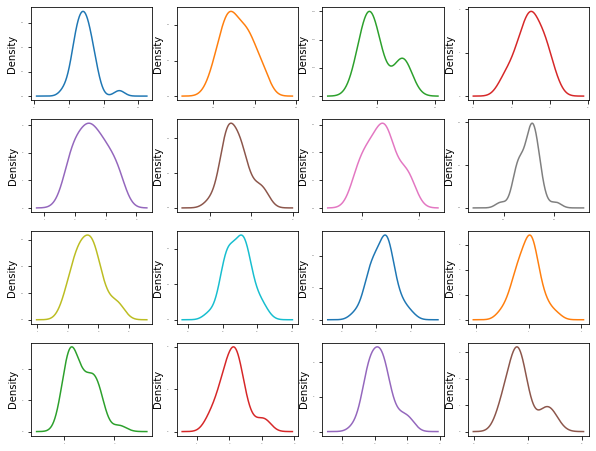

In [27]:
x.plot(kind='density',subplots=True,  layout=(6,4), sharex=False, legend=False, fontsize=1, figsize=(10,12))
plt.show()

In [28]:
#checking the skewness of the data
x.skew()

R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

>As we see from the above desription that their is some skewness present in the 'Runs' column but it might be possible that some teams had scored more runs and some teams had scored less runs, so we don't have to remove skewness from the runs column.

In [29]:
#checking Statistical sumary
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


>We can see through the above description that the standard deviation are high in 'R', 'AB', 'H', 'BB', 'SO', 'RA', 'ER'. So that means the data is spread too much.

>Range is high in these columns.

In [30]:
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [31]:
y

0      95
1      83
2      81
3      76
4      74
5      93
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

> Model Building

In [32]:
#checking the best random state
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i}, the training accuracy is:- {r2_score(y_train,pred_train)}")
    print(f"At random state {i}, the testing accuracy is:- {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0, the training accuracy is:- 0.9740342087681649
At random state 0, the testing accuracy is:- 0.3988859331278267


At random state 1, the training accuracy is:- 0.9802780428217764
At random state 1, the testing accuracy is:- 0.3146174936334324


At random state 2, the training accuracy is:- 0.9945593908141699
At random state 2, the testing accuracy is:- -2.1905436325151566


At random state 3, the training accuracy is:- 0.9760342041610788
At random state 3, the testing accuracy is:- 0.607883960154561


At random state 4, the training accuracy is:- 0.965360727692537
At random state 4, the testing accuracy is:- 0.6694899060031698


At random state 5, the training accuracy is:- 0.9542874439438673
At random state 5, the testing accuracy is:- 0.7639635508871454


At random state 6, the training accuracy is:- 0.9548034139459601
At random state 6, the testing accuracy is:- 0.7045610801845386


At random state 7, the training accuracy is:- 0.9686347809215807
At random state 7, 

At random state 62, the training accuracy is:- 0.9766377936202589
At random state 62, the testing accuracy is:- -1.097020880060274


At random state 63, the training accuracy is:- 0.9614105276248298
At random state 63, the testing accuracy is:- 0.4885712974639572


At random state 64, the training accuracy is:- 0.9606278753237357
At random state 64, the testing accuracy is:- 0.5911292218068784


At random state 65, the training accuracy is:- 0.9499093883136952
At random state 65, the testing accuracy is:- 0.8259641259647617


At random state 66, the training accuracy is:- 0.9894825335563616
At random state 66, the testing accuracy is:- 0.5198518583424347


At random state 67, the training accuracy is:- 0.9462666069247796
At random state 67, the testing accuracy is:- 0.8020716341824419


At random state 68, the training accuracy is:- 0.9769746037885544
At random state 68, the testing accuracy is:- -0.1581373640820749


At random state 69, the training accuracy is:- 0.9863733271516847
At

At random state 132, the training accuracy is:- 0.9937879602719774
At random state 132, the testing accuracy is:- 0.6992032182846897


At random state 133, the training accuracy is:- 0.9592175180828576
At random state 133, the testing accuracy is:- 0.2825660280795569


At random state 134, the training accuracy is:- 0.9712728506547186
At random state 134, the testing accuracy is:- 0.053733804886139214


At random state 135, the training accuracy is:- 0.9692226934786139
At random state 135, the testing accuracy is:- 0.028469997655321544


At random state 136, the training accuracy is:- 0.9768243992023551
At random state 136, the testing accuracy is:- 0.27432119154322565


At random state 137, the training accuracy is:- 0.9588785733582771
At random state 137, the testing accuracy is:- 0.7141851222891515


At random state 138, the training accuracy is:- 0.9684657553198843
At random state 138, the testing accuracy is:- -0.30759595880662904


At random state 139, the training accuracy is:- 

At random state 193, the testing accuracy is:- 0.2197369623118559


At random state 194, the training accuracy is:- 0.992036699805749
At random state 194, the testing accuracy is:- -0.16261730136007624


At random state 195, the training accuracy is:- 0.957927823042104
At random state 195, the testing accuracy is:- 0.437309978929458


At random state 196, the training accuracy is:- 0.9679016158830115
At random state 196, the testing accuracy is:- 0.6664775673641583


At random state 197, the training accuracy is:- 0.9643562218318887
At random state 197, the testing accuracy is:- 0.6236724361795263


At random state 198, the training accuracy is:- 0.9693139917859215
At random state 198, the testing accuracy is:- 0.5228012337042637


At random state 199, the training accuracy is:- 0.997170676624613
At random state 199, the testing accuracy is:- -0.47125297057267423




> From the above stats we can see that at random state 114, the testing accuracy and the training accuracy is highest.

> Now testing the best random state in different columns.

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=114)

In [34]:
from sklearn.kernel_ridge import KernelRidge

In [35]:
model=[LinearRegression(),SVR(),RandomForestRegressor(),DecisionTreeRegressor(),KernelRidge()]

In [36]:
for n in model:
    n.fit(x_train,y_train)
    n.score(x_train,y_train)
    predm=n.predict(x_test)
    print('r2_score of',n,'is')
    print(r2_score(y_test,predm))
    print(mean_squared_error(y_test,predm))
    print(mean_absolute_error(y_test,predm))
    print('\n')

r2_score of LinearRegression() is
0.9172122929401239
10.633621040135202
2.7820062112668467


r2_score of SVR() is
-0.12228099971439721
144.15075951887147
9.988103363043805


r2_score of RandomForestRegressor() is
0.5528300173010383
57.436499999999974
6.54111111111111


r2_score of DecisionTreeRegressor() is
-0.20242214532871983
154.44444444444446
10.444444444444445


r2_score of KernelRidge() is
0.9035177380266058
12.392610537915962
3.112642079591751




> Now checking the Cross Validation Score to check whether our models are overfitted or underfitted

In [37]:
scrli=cross_val_score(LinearRegression(),x,y,cv=7)
print('cross validation score of linear regression: ',scrli.mean())

cross validation score of linear regression:  0.38908046442899824


In [38]:
scrkr=cross_val_score(KernelRidge(),x,y,cv=7)
print('cross validation score of KrenelRidgeRegressor: ',scrkr.mean())

cross validation score of KrenelRidgeRegressor:  0.5424076295148648


In [39]:
scrrf=cross_val_score(RandomForestRegressor(),x,y, cv=7)
print('cross validation score of RandomForestregression: ',scrrf.mean())

cross validation score of RandomForestregression:  0.040958957779935634


In [40]:
scrdtr=cross_val_score(DecisionTreeRegressor(),x,y, cv=7)
print('cross validation score of DecisionTreeregression: ',scrdtr.mean())

cross validation score of DecisionTreeregression:  -1.025761316589912


In [41]:
scrsvr=cross_val_score(SVR(),x,y, cv=7)
print('cross validation score of SVR: ',scrsvr.mean())

cross validation score of SVR:  -0.44365990018156637


>Minimum difference in r2_score and cross validation score is for KernalRidge. So it is our best model

>Doing GridSearchCV for getting best parameters

In [42]:
#creating parameter list to pass in GridSearchCV
parameters= {'kernel': ['linear','string','callable'],
             'degree': np.arange(0,5),
             'alpha': np.arange(1.0,5.0)}

In [43]:
GCV=GridSearchCV(KernelRidge(),parameters,cv=7)

In [44]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=KernelRidge(),
             param_grid={'alpha': array([1., 2., 3., 4.]),
                         'degree': array([0, 1, 2, 3, 4]),
                         'kernel': ['linear', 'string', 'callable']})

In [45]:
#getting the best parameters found by GridSearchCV
GCV.best_params_

{'alpha': 4.0, 'degree': 0, 'kernel': 'linear'}

In [46]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [47]:
r2_score(GCV_pred,y_test)

0.9201912317445451

In [48]:
joblib.dump(GCV.best_estimator_,'Baseball.obj')

['Baseball.obj']

>Case Study:

  >>This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the          number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different    features which are Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned      Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors that will be used as the inputs to the machine learning and the    output will be a value that represents the number of wins. With these inputs we have to predict the number of wins for a        given team.
   

>Findings:

   >>the columns in the dataset have only numeric values.
   
   >>there are no null values present in the dataset.
   
   >>majority of the teams have no of wins in the range of 65 to 100.
   
   >>the runs scored by home runs by the teams are majority lie in the range of 127 to 180.
   
   >>the majority of players that strike out in a team in this season(2014) are lie in the range of 1100 to 1350.
   
   >>the minimum 100 Home runs is scored by a team and maximum 230 Home Runs are scored by a team in this season(2014).The range    in which most of the teams scored Home Runs is between 140 to 178.
   
   >>majority of the team scored 550 to 750 runs.
   
   >>we can observe that Majority of the times the players reach the Second base as compare to the third base.
   
   >>we can see that between 30 to 55 times the players are saved in the 2014 season.
   
   >>we can see that 70 to 95 times the bases were stolen by the batter and the pitcher was not able to out that batter.
   
   >>Runs allowed, Earned runs, Earned runs average and saves are the most positive correlated columns with the wins columns.
   
   >>Error are the least correlated column with the wins column, as if errors are increasing the no of wins will be decreased.
   
   >>We can observe that all the columns which have runs in it are moderately positive correlated to the wins column as runs        help the team to win the match.
   
   
>Predictions:

   >>we can see that at random state 114, the testing accuracy and the training accuracy is highest.
   
   >>The best r2_score we get are from Logistic Regression and kernel Ridge.
   
   >>After doing Cross Validation. Minimum difference in r2_score and cross validation score is for KernalRidge. So it is our      best model.
   
   >>After doing hyperparameter tuning. we increase the score of our model from 54% to 92%.